# Bai 1

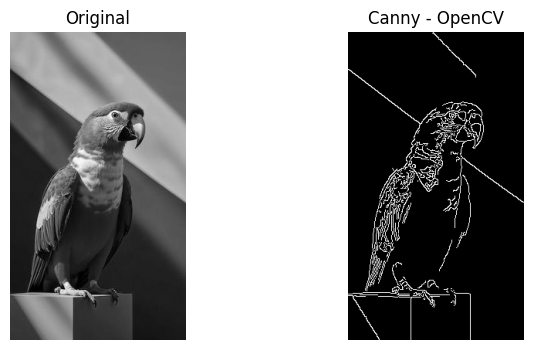

In [7]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread("../image/Opencv.png", cv2.IMREAD_GRAYSCALE)

# Áp dụng Canny
edges_cv = cv2.Canny(
    img,
    threshold1=100,
    threshold2=200
)

# Hiển thị
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Canny - OpenCV")
plt.imshow(edges_cv, cmap='gray')
plt.axis('off')

plt.show()

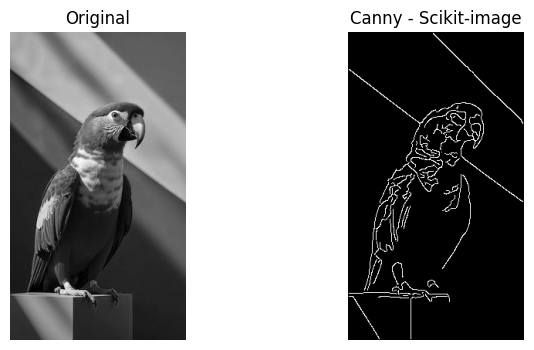

In [8]:
from skimage import io, color, feature
import matplotlib.pyplot as plt

# Đọc ảnh
img = io.imread("../image/Opencv.png")

# Chuyển sang grayscale
gray = color.rgb2gray(img)

# Áp dụng Canny
edges_sk = feature.canny(
    gray,
    sigma=1.5,
    low_threshold=0.1,
    high_threshold=0.3
)

# Hiển thị
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Canny - Scikit-image")
plt.imshow(edges_sk, cmap='gray')
plt.axis('off')

plt.show()

# Bai 2

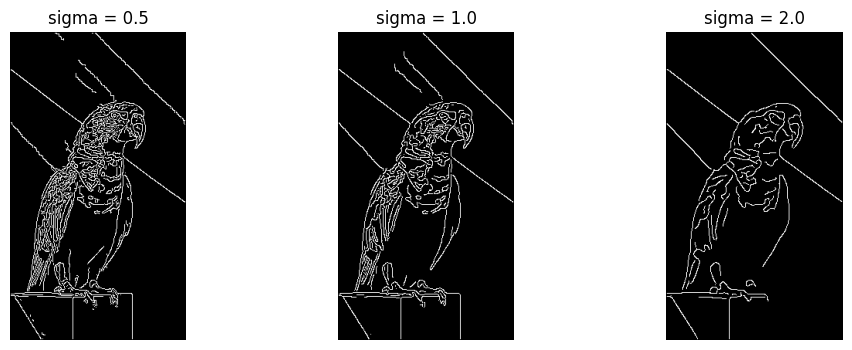

In [9]:
# So sánh ảnh Canny với các giá trị sigma khác nhau
sigmas = [0.5, 1.0, 2.0]

plt.figure(figsize=(12,4))
for i, s in enumerate(sigmas):
    edges = feature.canny(gray, sigma=s)
    plt.subplot(1,3,i+1)
    plt.title(f"sigma = {s}")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

plt.show()

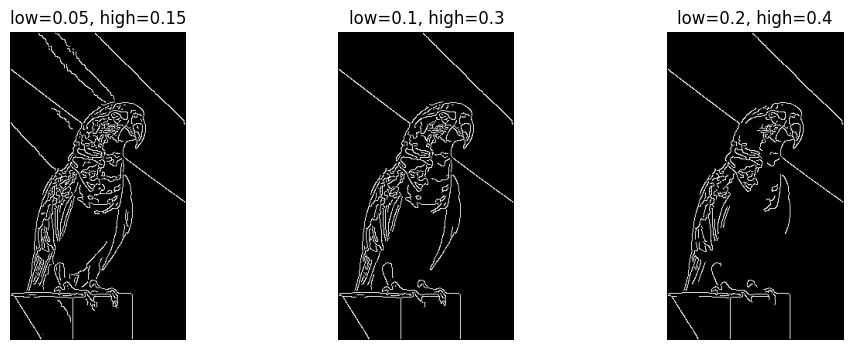

In [10]:
# So sánh ảnh Canny với các giá trị ngưỡng khác nhau
thresholds = [
    (0.05, 0.15),
    (0.1, 0.3),
    (0.2, 0.4)
]

plt.figure(figsize=(12,4))
for i, (low, high) in enumerate(thresholds):
    edges = feature.canny(
        gray,
        sigma=1.0,
        low_threshold=low,
        high_threshold=high
    )
    plt.subplot(1,3,i+1)
    plt.title(f"low={low}, high={high}")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

plt.show()

# bai 3
- với ảnh có nhiều nhiễu : thấy sigma nhỏ thì có nhiều cạnh giả do nhiễu ngược lại lớn thì giảm nhiễu nhưng mất chi tiết nhỏ.
- Ảnh độ tương phản thấp : Ngưỡng cao -> Mất nhiều cạnh . Ngưỡng thấp -> Phát hiện được cạnh yếu.
- Ảnh nhiều chi tiết : Sigma nhỏ -> Giữ nhiều chi tiết . Sigma lớn -> Mất chi tiết nhỏ
- => Thuật toán Canny cho kết quả tốt trên nhiều loại ảnh khác nhau, tuy nhiên hiệu quả phụ thuộc lớn vào việc lựa chọn tham số. Đối với ảnh nhiều nhiễu, cần tăng tham số sigma để làm mịn ảnh. Với ảnh có độ tương phản thấp, việc giảm ngưỡng giúp phát hiện các cạnh yếu. Đối với ảnh có nhiều chi tiết, cần lựa chọn sigma phù hợp để tránh mất thông tin quan trọng. Canny là thuật toán phát hiện biên mạnh mẽ nhưng cần tinh chỉnh tham số theo từng loại ảnh






# Bai 4

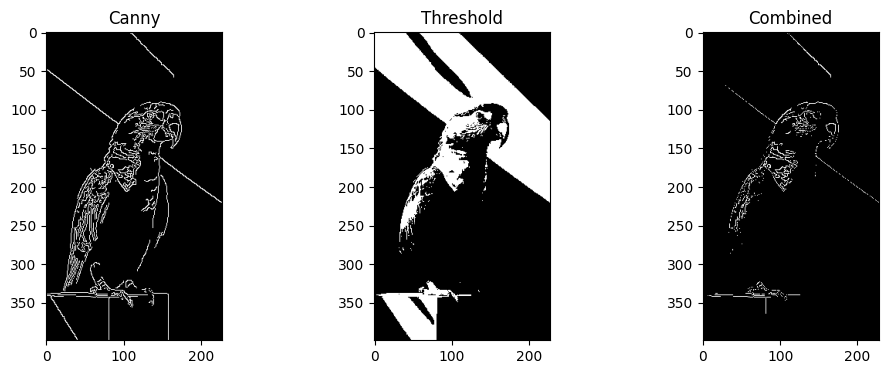

In [12]:
# Kết hợp Canny và Thresholding (Kết hợp với các thuật toán phân đoạn để tìm các vùng trong ảnh)
img = cv2.imread("../image/Opencv.png", 0)
edges = cv2.Canny(img, 100, 200)
_, thresh = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

combined = cv2.bitwise_and(edges, thresh)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.title("Canny"); plt.imshow(edges, cmap='gray')
plt.subplot(1,3,2); plt.title("Threshold"); plt.imshow(thresh, cmap='gray')
plt.subplot(1,3,3); plt.title("Combined"); plt.imshow(combined, cmap='gray')
plt.show()

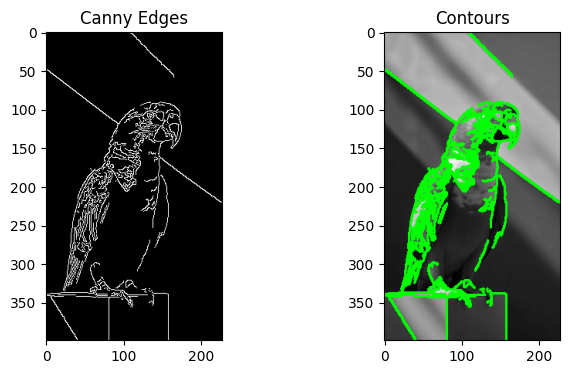

In [13]:
# Kết hợp Canny với nhận dạng hình dạng 
edges = cv2.Canny(img, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_contours, contours, -1, (0,255,0), 2)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.title("Canny Edges"); plt.imshow(edges, cmap='gray')
plt.subplot(1,2,2); plt.title("Contours"); plt.imshow(img_contours)
plt.show()